In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_score

In [83]:
df = pd.read_excel(r"C:\Users\Robyi\Downloads\data survey responden.xlsx")

In [84]:
df.head()

,usia,jenis_kelamin,pekerjaan,domisili,jenis_kendaraan_yang_sering_dicuci,frekuensi_mencuci_perbulan,alasan_memilih_disini,kualitas_hasil_cucian,waktu_pengerjaan,kepuasan_harga,kepuasan_layanan
0,17,Pria,Pelajar/Mahasiswa,Kecamatan Ciruas,Motor,5,Rekomendasi teman/keluarga,Sangat Baik,Netral,Netral,Baik
1,35,Wanita,Pekerja Swasta,Kecamatan Walantaka,Motor,3,Lokasi dekat,Baik,Puas,Netral,Baik
2,46,Pria,Pekerja Swasta,Kecamatan Serang,Mobil,1,Harga terjangkau,Sangat Baik,Sangat Puas,Sangat Puas,Sangat Baik
3,34,Pria,Pekerja Swasta,Kecamatan Ciruas,Motor,3,Harga terjangkau,Baik,Puas,Puas,Baik
4,30,Wanita,Pekerja Swasta,Kecamatan Walantaka,Motor,2,Rekomendasi teman/keluarga,Baik,Sangat Puas,Puas,Cukup


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   usia                                40 non-null     int64 
 1   jenis_kelamin                       40 non-null     object
 2   pekerjaan                           40 non-null     object
 3   domisili                            40 non-null     object
 4   jenis_kendaraan_yang_sering_dicuci  40 non-null     object
 5   frekuensi_mencuci_perbulan          40 non-null     int64 
 6   alasan_memilih_disini               40 non-null     object
 7   kualitas_hasil_cucian               40 non-null     object
 8   waktu_pengerjaan                    40 non-null     object
 9   kepuasan_harga                      40 non-null     object
 10  kepuasan_layanan                    40 non-null     object
dtypes: int64(2), object(9)
memory usage: 3.6+ KB


<Axes: >

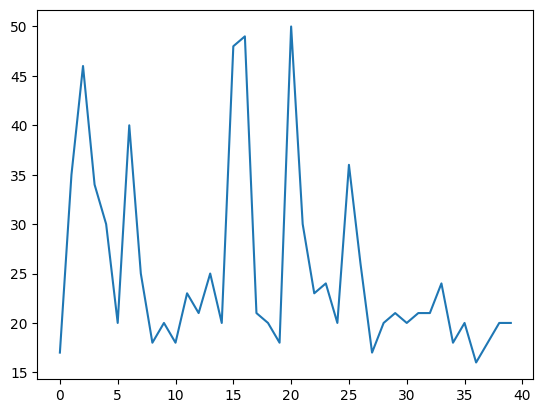

In [86]:
df['usia'].plot()

<Axes: >

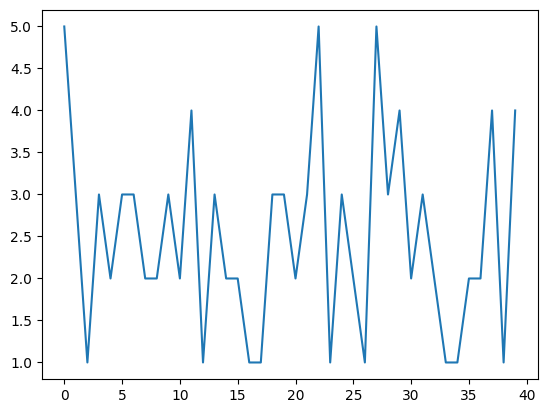

In [87]:
df['frekuensi_mencuci_perbulan'].plot()

<Axes: ylabel='count'>

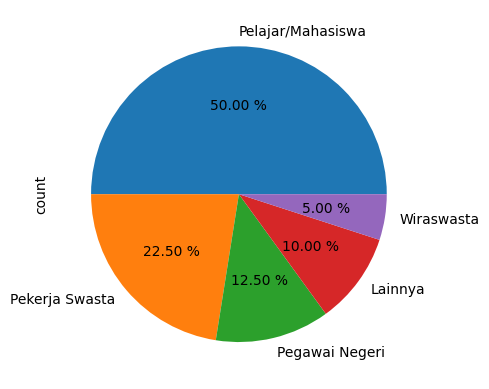

In [88]:
df['pekerjaan'].value_counts().plot(kind='pie', autopct = '%.2f %%')

<Axes: ylabel='count'>

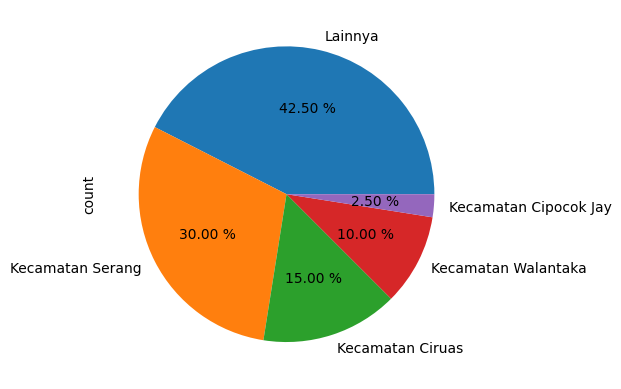

In [89]:
df['domisili'].value_counts().plot(kind='pie', autopct = '%.2f %%')

<Axes: ylabel='count'>

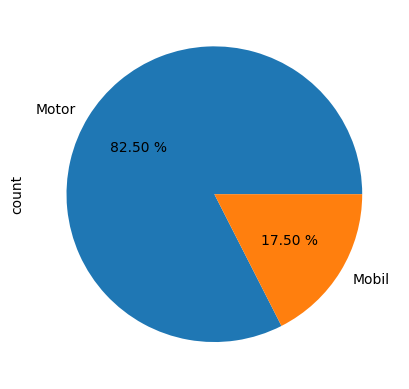

In [90]:
df['jenis_kendaraan_yang_sering_dicuci'].value_counts().plot(kind='pie', autopct = '%.2f %%')

<Axes: ylabel='count'>

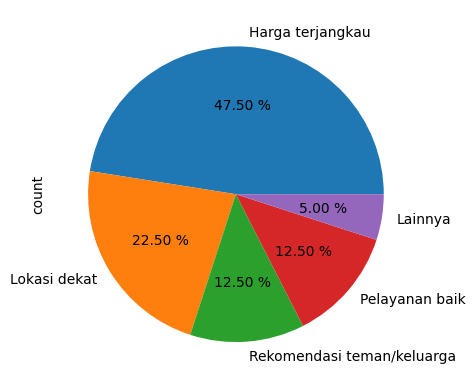

In [91]:
df['alasan_memilih_disini'].value_counts().plot(kind='pie', autopct = '%.2f %%')

<Axes: ylabel='count'>

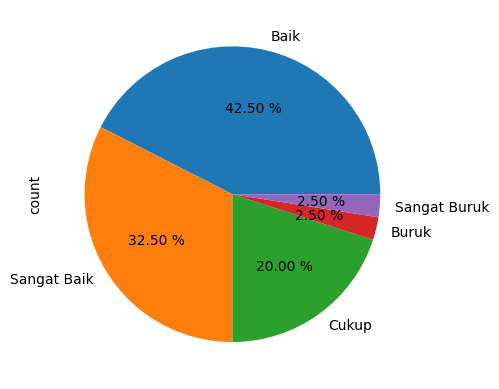

In [92]:
df['kualitas_hasil_cucian'].value_counts().plot(kind='pie', autopct = '%.2f %%')

<Axes: ylabel='count'>

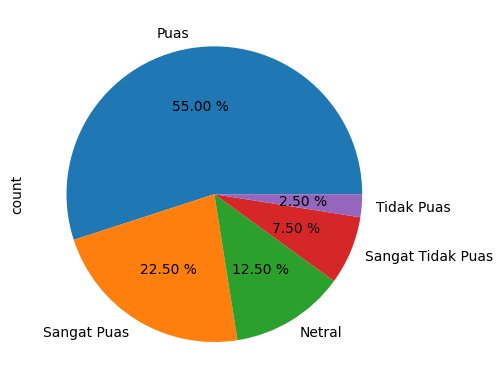

In [93]:
df['waktu_pengerjaan'].value_counts().plot(kind='pie', autopct = '%.2f %%')

<Axes: ylabel='count'>

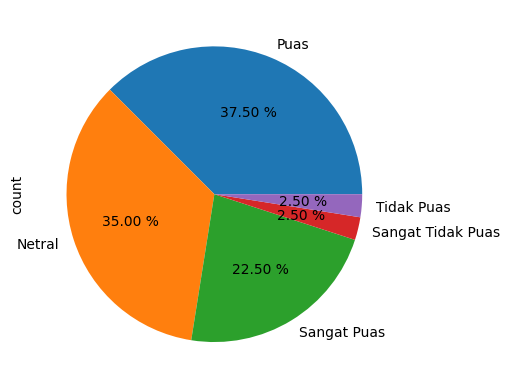

In [94]:
df['kepuasan_harga'].value_counts().plot(kind='pie', autopct = '%.2f %%')

<Axes: ylabel='count'>

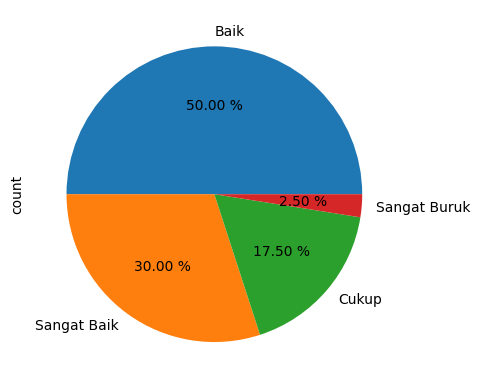

In [95]:
df['kepuasan_layanan'].value_counts().plot(kind='pie', autopct = '%.2f %%')

In [96]:
ordinal_mapping = {
    'Sangat Buruk': 1,
    'Buruk': 2,
    'Cukup': 3,
    'Baik': 4,
    'Sangat Baik': 5,
    
    'Sangat Tidak Puas': 1,
    'Tidak Puas':2,
    'Netral': 3,   
    'Puas': 4,
    'Sangat Puas': 5,
}

In [97]:
df['kualitas_hasil_cucian'] = df['kualitas_hasil_cucian'].replace(ordinal_mapping)
df['waktu_pengerjaan'] = df['waktu_pengerjaan'].replace(ordinal_mapping)
df['kepuasan_harga'] = df['kepuasan_harga'].replace(ordinal_mapping)
df['kepuasan_layanan'] = df['kepuasan_layanan'].replace(ordinal_mapping)

In [98]:
df.head()

,usia,jenis_kelamin,pekerjaan,domisili,jenis_kendaraan_yang_sering_dicuci,frekuensi_mencuci_perbulan,alasan_memilih_disini,kualitas_hasil_cucian,waktu_pengerjaan,kepuasan_harga,kepuasan_layanan
0,17,Pria,Pelajar/Mahasiswa,Kecamatan Ciruas,Motor,5,Rekomendasi teman/keluarga,5,3,3,4
1,35,Wanita,Pekerja Swasta,Kecamatan Walantaka,Motor,3,Lokasi dekat,4,4,3,4
2,46,Pria,Pekerja Swasta,Kecamatan Serang,Mobil,1,Harga terjangkau,5,5,5,5
3,34,Pria,Pekerja Swasta,Kecamatan Ciruas,Motor,3,Harga terjangkau,4,4,4,4
4,30,Wanita,Pekerja Swasta,Kecamatan Walantaka,Motor,2,Rekomendasi teman/keluarga,4,5,4,3


In [99]:
print(df['usia'].min())
print(df['usia'].max())
print(df['frekuensi_mencuci_perbulan'].min())
print(df['frekuensi_mencuci_perbulan'].max())

16
50
1
5


In [100]:
print(df['kualitas_hasil_cucian'].value_counts())
print(df['waktu_pengerjaan'].value_counts())
print(df['kepuasan_harga'].value_counts())
print(df['kepuasan_layanan'].value_counts())

kualitas_hasil_cucian
4    17
5    13
3     8
2     1
1     1
Name: count, dtype: int64
waktu_pengerjaan
4    22
5     9
3     5
1     3
2     1
Name: count, dtype: int64
kepuasan_harga
4    15
3    14
5     9
1     1
2     1
Name: count, dtype: int64
kepuasan_layanan
4    20
5    12
3     7
1     1
Name: count, dtype: int64


In [101]:
minmax = MinMaxScaler()

In [102]:
df[['usia', 'frekuensi_mencuci_perbulan',]] = minmax.fit_transform(
    df[['usia', 'frekuensi_mencuci_perbulan']]
)

In [103]:
df.head()

,usia,jenis_kelamin,pekerjaan,domisili,jenis_kendaraan_yang_sering_dicuci,frekuensi_mencuci_perbulan,alasan_memilih_disini,kualitas_hasil_cucian,waktu_pengerjaan,kepuasan_harga,kepuasan_layanan
0,0.029412,Pria,Pelajar/Mahasiswa,Kecamatan Ciruas,Motor,1.00,Rekomendasi teman/keluarga,5,3,3,4
1,0.558824,Wanita,Pekerja Swasta,Kecamatan Walantaka,Motor,0.50,Lokasi dekat,4,4,3,4
2,0.882353,Pria,Pekerja Swasta,Kecamatan Serang,Mobil,0.00,Harga terjangkau,5,5,5,5
3,0.529412,Pria,Pekerja Swasta,Kecamatan Ciruas,Motor,0.50,Harga terjangkau,4,4,4,4
4,0.411765,Wanita,Pekerja Swasta,Kecamatan Walantaka,Motor,0.25,Rekomendasi teman/keluarga,4,5,4,3


In [104]:
df = pd.get_dummies(
    df,
    columns=['jenis_kelamin', 'pekerjaan', 'domisili', 
             'jenis_kendaraan_yang_sering_dicuci', 'alasan_memilih_disini'], dtype=int)

In [105]:
df.head()

,usia,frekuensi_mencuci_perbulan,kualitas_hasil_cucian,waktu_pengerjaan,kepuasan_harga,kepuasan_layanan,jenis_kelamin_Pria,jenis_kelamin_Wanita,pekerjaan_Lainnya,pekerjaan_Pegawai Negeri,...,domisili_Kecamatan Serang,domisili_Kecamatan Walantaka,domisili_Lainnya,jenis_kendaraan_yang_sering_dicuci_Mobil,jenis_kendaraan_yang_sering_dicuci_Motor,alasan_memilih_disini_Harga terjangkau,alasan_memilih_disini_Lainnya,alasan_memilih_disini_Lokasi dekat,alasan_memilih_disini_Pelayanan baik,alasan_memilih_disini_Rekomendasi teman/keluarga
0,0.029412,1.00,5,3,3,4,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0.558824,0.50,4,4,3,4,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0.882353,0.00,5,5,5,5,1,0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0.529412,0.50,4,4,4,4,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0.411765,0.25,4,5,4,3,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [106]:
inertia = []
silhouette_scores = []
K = range(2, 11)

In [107]:
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, max_iter=400)
    kmeans.fit(df)

    inertia.append(kmeans.inertia_)
    
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df, labels))

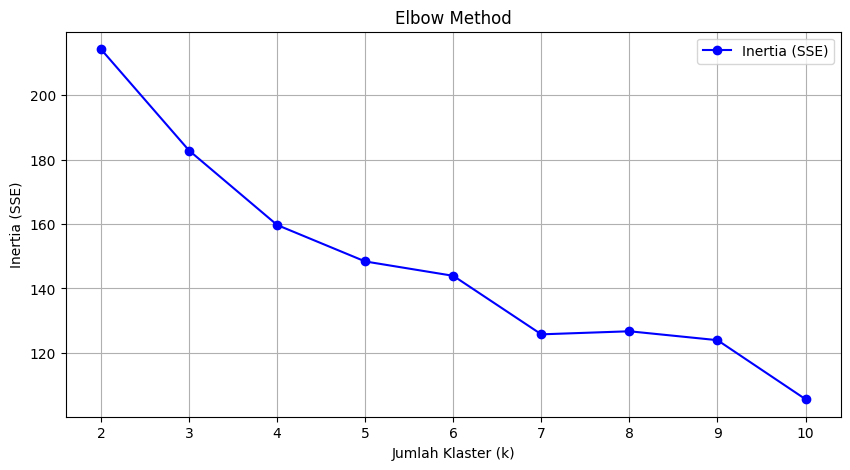

In [108]:
plt.figure(figsize=(10, 5))
plt.plot(K, inertia, 'bo-', label='Inertia (SSE)')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method')
plt.legend()
plt.grid(True)
plt.show()

KARENA ADA PENURUNAN INERTIA (SSE) YANG SIGNIFIKAN ANTARA K = 2 DAN  K = 3 MAKA CLUSTER OPTIMAL = 3

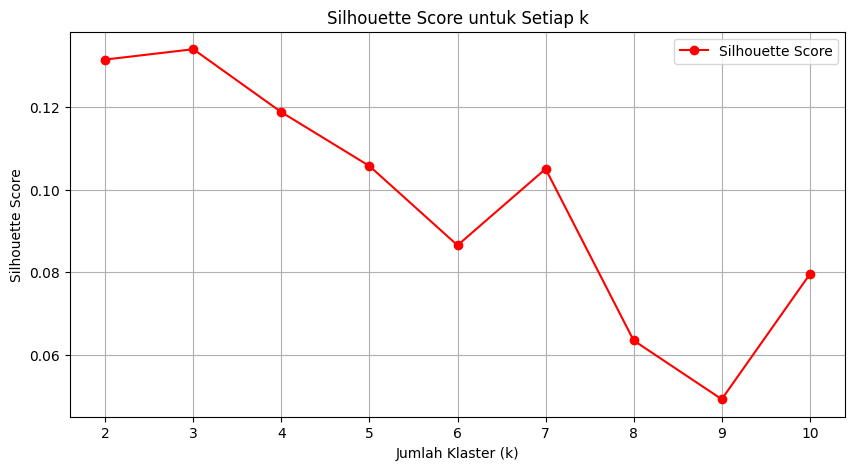

In [109]:
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Setiap k')
plt.legend()
plt.grid(True)
plt.show()

TITIK TERTINGGI ADA PADA K = 3 YAITU 0.13 SILHOUETTE SCORE MAKA CLUSTER OPTIMAL = 3

In [110]:
KmeansOpt = KMeans(n_clusters=3, init='k-means++', random_state=42, max_iter=400, tol=0.001)
KmeansOpt.fit(df)

KMeans(max_iter=400, n_clusters=3, random_state=42, tol=0.001)

In [111]:
df['Cluster'] = KmeansOpt.labels_

In [112]:
print(df['Cluster'].head())

0    0
1    0
2    2
3    0
4    0
Name: Cluster, dtype: int32


In [113]:
df.head()

,usia,frekuensi_mencuci_perbulan,kualitas_hasil_cucian,waktu_pengerjaan,kepuasan_harga,kepuasan_layanan,jenis_kelamin_Pria,jenis_kelamin_Wanita,pekerjaan_Lainnya,pekerjaan_Pegawai Negeri,...,domisili_Kecamatan Walantaka,domisili_Lainnya,jenis_kendaraan_yang_sering_dicuci_Mobil,jenis_kendaraan_yang_sering_dicuci_Motor,alasan_memilih_disini_Harga terjangkau,alasan_memilih_disini_Lainnya,alasan_memilih_disini_Lokasi dekat,alasan_memilih_disini_Pelayanan baik,alasan_memilih_disini_Rekomendasi teman/keluarga,Cluster
0,0.029412,1.00,5,3,3,4,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.558824,0.50,4,4,3,4,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
2,0.882353,0.00,5,5,5,5,1,0,0,0,...,0,0,1,0,1,0,0,0,0,2
3,0.529412,0.50,4,4,4,4,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.411765,0.25,4,5,4,3,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


In [120]:
df['Cluster'].value_counts()

Cluster
0    29
2    10
1     1
Name: count, dtype: int64

In [114]:
cluster_summary = df.groupby('Cluster').mean()

In [115]:
cluster_summary.head()

,usia,frekuensi_mencuci_perbulan,kualitas_hasil_cucian,waktu_pengerjaan,kepuasan_harga,kepuasan_layanan,jenis_kelamin_Pria,jenis_kelamin_Wanita,pekerjaan_Lainnya,pekerjaan_Pegawai Negeri,...,domisili_Kecamatan Serang,domisili_Kecamatan Walantaka,domisili_Lainnya,jenis_kendaraan_yang_sering_dicuci_Mobil,jenis_kendaraan_yang_sering_dicuci_Motor,alasan_memilih_disini_Harga terjangkau,alasan_memilih_disini_Lainnya,alasan_memilih_disini_Lokasi dekat,alasan_memilih_disini_Pelayanan baik,alasan_memilih_disini_Rekomendasi teman/keluarga
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.247465,0.396552,3.793103,3.62069,3.482759,3.965517,0.586207,0.413793,0.103448,0.103448,...,0.241379,0.068966,0.448276,0.172414,0.827586,0.448276,0.0,0.241379,0.137931,0.172414
1,0.235294,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
2,0.355882,0.350000,4.900000,4.70000,4.800000,4.600000,0.800000,0.200000,0.100000,0.200000,...,0.500000,0.200000,0.300000,0.100000,0.900000,0.500000,0.2,0.200000,0.100000,0.000000


In [121]:
df.to_excel('clusterSTP.xlsx')

In [123]:
cluster_summary.to_excel('SegmenSTP.xlsx')

In [117]:
print(cluster_summary['usia'] * (50-16) + 16)

Cluster
0    24.413793
1    24.000000
2    28.100000
Name: usia, dtype: float64


In [118]:
print(cluster_summary['frekuensi_mencuci_perbulan'] * (5-1) + 1)

Cluster
0    2.586207
1    1.000000
2    2.400000
Name: frekuensi_mencuci_perbulan, dtype: float64


In [119]:
df['Cluster'].value_counts()

Cluster
0    29
2    10
1     1
Name: count, dtype: int64

Cluster kualitas cucian
0       Puas
1       Sangat Tidak Puas
2       Netral

In [ ]:
Cluster Waktu Pengerjaan
0       Puas
1       Sangat Tidak Puas
2       Netral

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('Cluster', axis=1))
df_pca = pca.fit_transform(df.drop('Cluster', axis=1))

In [39]:
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

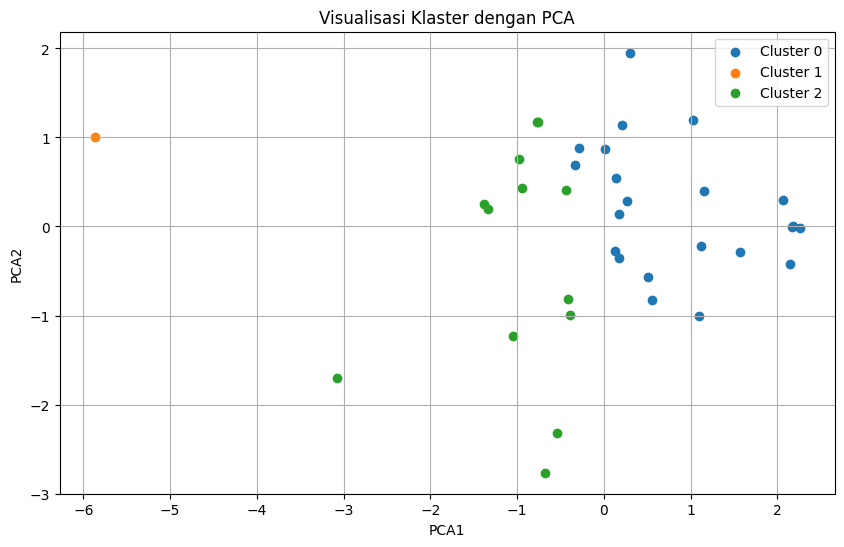

In [40]:
plt.figure(figsize=(10, 6))
for cluster in range(3):
    plt.scatter(
        df[df['Cluster'] == cluster]['PCA1'],
        df[df['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}'
    )

plt.title('Visualisasi Klaster dengan PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

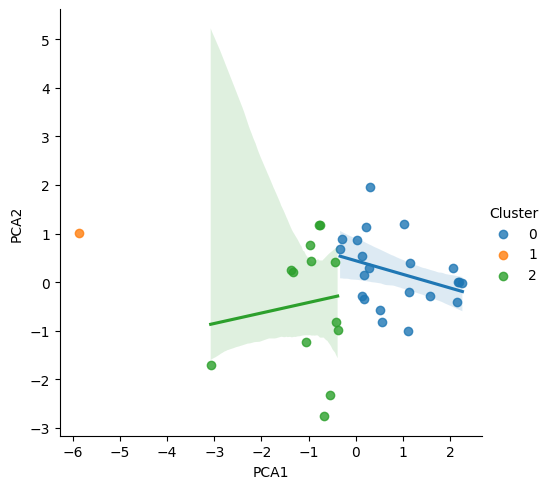

In [41]:
sns.lmplot(x = 'PCA1',y = 'PCA2',data=df, hue='Cluster', fit_reg=True)
plt.show()

In [42]:
scaled_centroid = KmeansOpt.cluster_centers_